# Capstone

## Problem Statement

Significant number of hotel reservations are called off due to cancellations or no shows. The typical reasons for cancellations include change of plans, scheduling conflicts, change of mind, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests, but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. 

Deliverable: 
To build a website for hotel’s staff to predict whether a customer will cancel the booking or not so that they are able to reduce loss by allowing more booking and at the same time ensuring the rooms are not overbooked.

## Contents:
- [Data Cleaning & EDA](#Data-Cleaning-and-Exploratory-Data-Analysis)
- [Data Modelling](#Data-Modelling)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)
- [Deployment of Model](#Deployment-of-Model)

### Feedback from part 3 presentation
- change the output of hyperparameter tuning to precision (look into f1 score as well)
- add hyperparameter to deal with imbalanced dataset: balance class(easiest), overbalancing,smote
- cost benefit analysis
- fp vs fn analysis
- extract feature that helps in prediction, recommendations to stakeholders to do - contigency plan
- base on analysis, ... most likely to affect prediction (choose most impt features for input in model deployment)

## Data Cleaning and Exploratory Data Analysis

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../Data/hotel_reservations.csv')

In [3]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
df.shape

(36275, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
df['Booking_ID'].value_counts()

INN00001    1
INN24187    1
INN24181    1
INN24182    1
INN24183    1
           ..
INN12086    1
INN12085    1
INN12084    1
INN12083    1
INN36275    1
Name: Booking_ID, Length: 36275, dtype: int64

There are no duplicates records.

In [7]:
df['no_of_previous_bookings'] = df['no_of_previous_cancellations'] + df['no_of_previous_bookings_not_canceled']
df['no_of_nights'] = df['no_of_week_nights'] + df['no_of_weekend_nights']

In [8]:
df['date_combined'] = (df['arrival_year'].astype(str) + '-' + df['arrival_month'].astype(str) + '-' + df['arrival_date'].astype(str))
df['date_combined'].replace('2018-2-29','2018-3-1', inplace=True)
df['date_combined'] = pd.to_datetime(df['date_combined'])

df['arrival_day'] = df['date_combined'].dt.dayofweek

In [9]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_previous_bookings,no_of_nights,date_combined,arrival_day
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,0,0,0,65.00,0,Not_Canceled,0,3,2017-10-02,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,0,0,0,106.68,1,Not_Canceled,0,5,2018-11-06,1
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,0,0,0,60.00,0,Canceled,0,3,2018-02-28,2
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,0,0,0,100.00,0,Canceled,0,2,2018-05-20,6
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,0,0,0,94.50,0,Canceled,0,2,2018-04-11,2


In [10]:
df['booking_status'] = np.where(df['booking_status'] == 'Canceled', 1, 0)

In [11]:
df.drop(['Booking_ID','date_combined'],axis=1,inplace=True)

In [12]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_previous_bookings,no_of_nights,arrival_day
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,...,Offline,0,0,0,65.00,0,0,0,3,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,...,Online,0,0,0,106.68,1,0,0,5,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,...,Online,0,0,0,60.00,0,1,0,3,2
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,...,Online,0,0,0,100.00,0,1,0,2,6
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,...,Online,0,0,0,94.50,0,1,0,2,2


### Data Dictionary

|Feature|Type|Description|
|:--|:--|:--|
|no_of_adults|integer|Number of adults| 
|no_of_children|integer|Number of Children| 
|no_of_weekend_nights|integer|Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel| 
|no_of_week_nights|integer|Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel|
|type_of_meal_plan|object|Type of meal plan booked by the customer|
|required_car_parking_space|integer|Does the customer require a car parking space? (0 - No, 1- Yes)| 
|room_type_reserved|object|Type of room reserved by the customer| 
|lead_time|integer|Number of days between the date of booking and the arrival date| 
|arrival_year|integer|Year of arrival date| 
|arrival_month|integer|Month of arrival date| 
|arrival_date|integer|Date of the month| 
|market_segment_type|object|Market segment designation| 
|repeated_guest|integer|Is the customer a repeated guest? (0 - No, 1- Yes)| 
|no_of_previous_cancellations|integer|Number of previous bookings that were canceled by the customer prior to the current booking| 
|no_of_previous_bookings_not_canceled|integer|Number of previous bookings not canceled by the customer prior to the current booking| 
|avg_price_per_room|float|Average price per day of the reservation; prices of the rooms are dynamic| 
|no_of_special_requests|integer|Total number of special requests made by the customer (e.g. high floor, view from the room, etc)| 
|booking_status|interger|Flag indicating if the booking was canceled or not (0 - Not canceled, 1 - Canceled)|
|no_of_previous_bookings|integer|Number of total previous bookings regardless if it was canceled or not|
|no_of_nights|integer|Number of total nights the guest stayed or booked to stay at the hotel| 
|arrival_day|integer|Day of arrival date (0 - Monday, 6 - Sunday)|

### Exploratory Data Analysis

In [13]:
df['booking_status'].value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

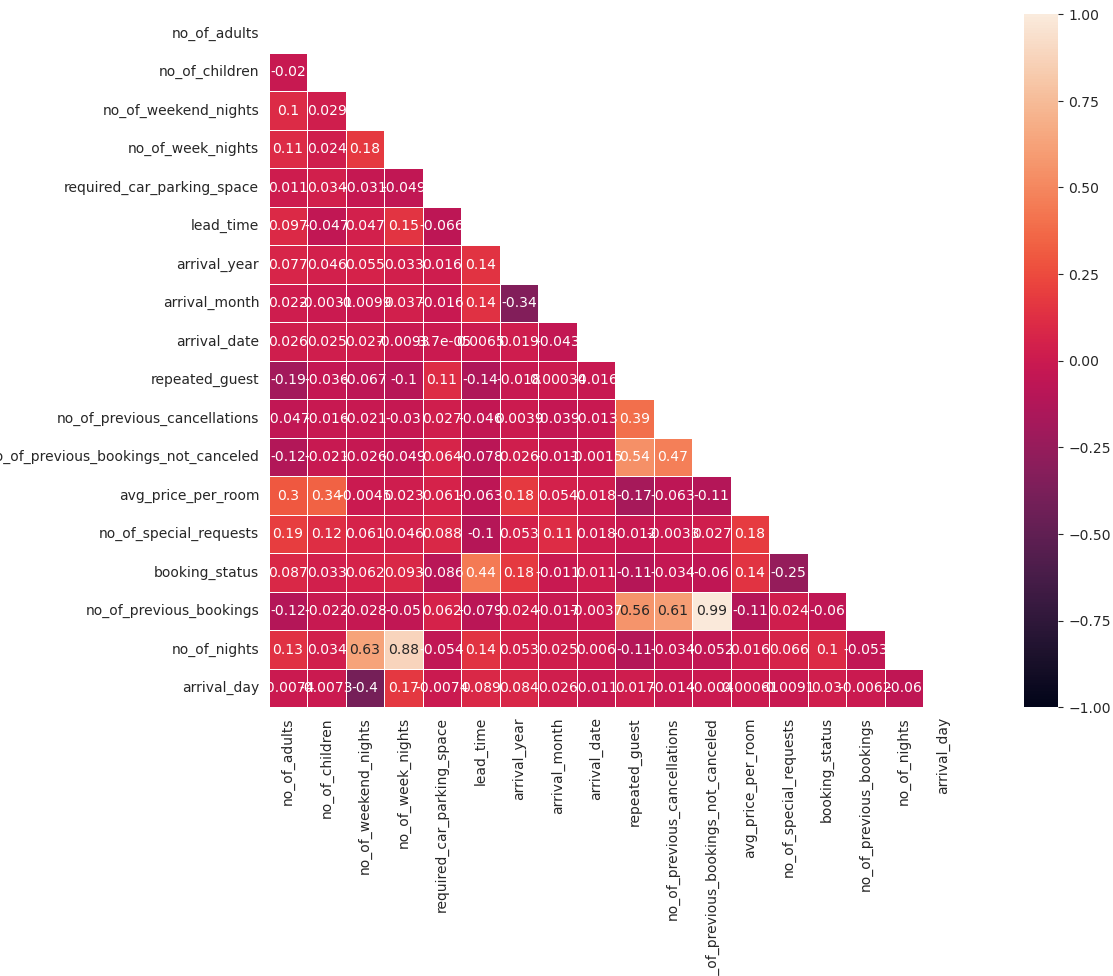

In [14]:
# This code is taken with minor modifications from https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Establish size of figure.
plt.figure(figsize = (16,9))

# Get correlation of variables.
corr = df.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)

In [15]:
df.corr()['booking_status'].sort_values(ascending=False)

booking_status                          1.000000
lead_time                               0.438538
arrival_year                            0.179529
avg_price_per_room                      0.142569
no_of_nights                            0.103475
no_of_week_nights                       0.092996
no_of_adults                            0.086920
no_of_weekend_nights                    0.061563
no_of_children                          0.033078
arrival_day                             0.030316
arrival_date                            0.010629
arrival_month                          -0.011233
no_of_previous_cancellations           -0.033728
no_of_previous_bookings_not_canceled   -0.060179
no_of_previous_bookings                -0.060386
required_car_parking_space             -0.086185
repeated_guest                         -0.107287
no_of_special_requests                 -0.253070
Name: booking_status, dtype: float64

Not much correlation between the booking status and the other columns, except for a slight positive correlation between lead time and booking status.

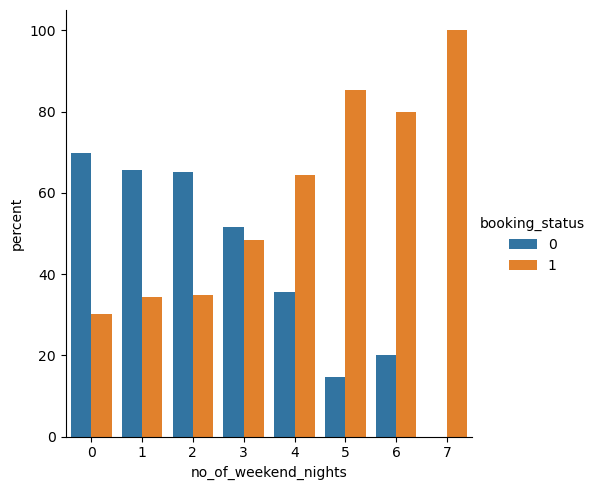

In [16]:
(df.groupby('no_of_weekend_nights')['booking_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), 
x='no_of_weekend_nights',y='percent',hue='booking_status',kind='bar'));

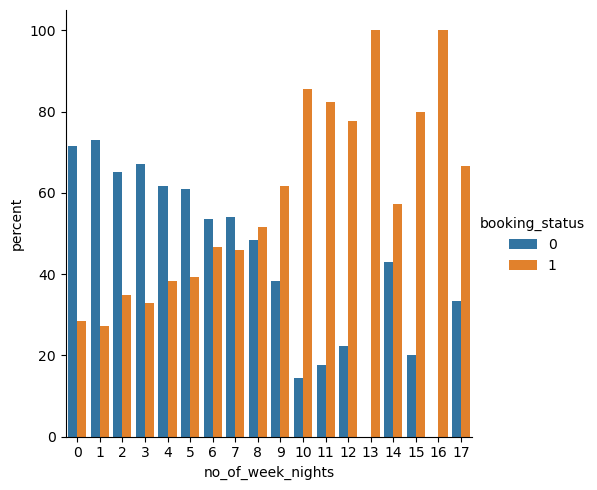

In [17]:
(df.groupby('no_of_week_nights')['booking_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), 
x='no_of_week_nights',y='percent',hue='booking_status',kind='bar'));

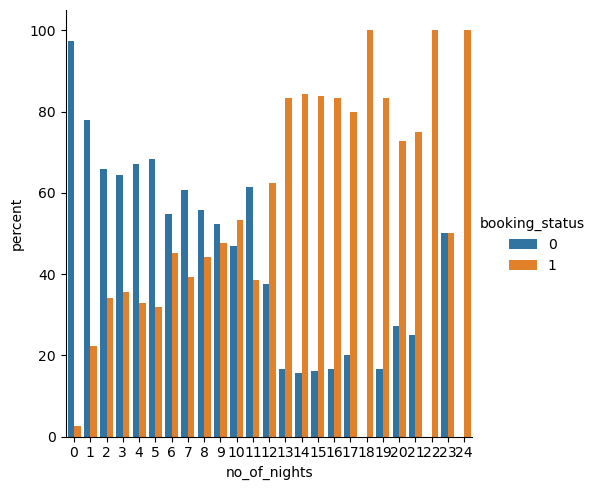

In [18]:
(df.groupby('no_of_nights')['booking_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), 
x='no_of_nights',y='percent',hue='booking_status',kind='bar'));

In general, the longer the customer is staying at the hotel, they more likely they are to cancel the booking. Those with more than 12 nights have cancellation rates of >= 50%

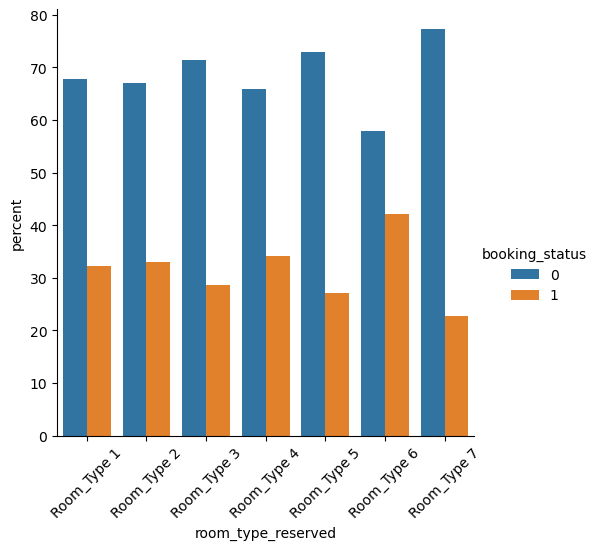

In [19]:
(df.groupby('room_type_reserved')['booking_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), 
x='room_type_reserved',y='percent',hue='booking_status',kind='bar'))
plt.xticks(rotation=45);

The type of rooms does not seem to have much impact on the cancellation rates.

<AxesSubplot: xlabel='booking_status', ylabel='lead_time'>

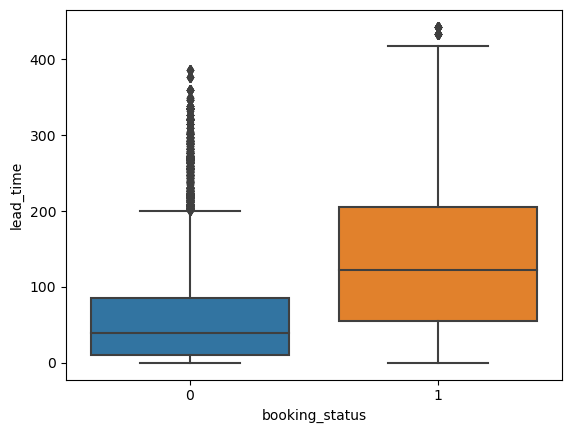

In [20]:
sns.boxplot(x='booking_status',y='lead_time',data=df)

Those who booked the hotel with more lead time are more likely to cancel their booking. This is expected as they have have more time to make informed decisions and change their mind.

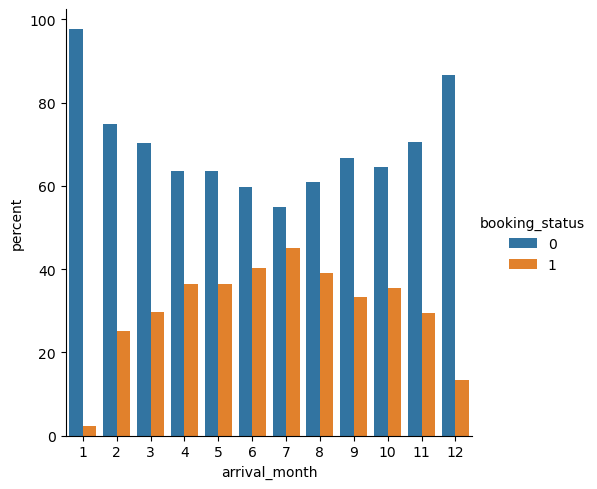

In [21]:
(df.groupby('arrival_month')['booking_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), 
x='arrival_month',y='percent',hue='booking_status',kind='bar'));

Cancellations are less likely during December and January (Xmas/New Year travels perhaps).

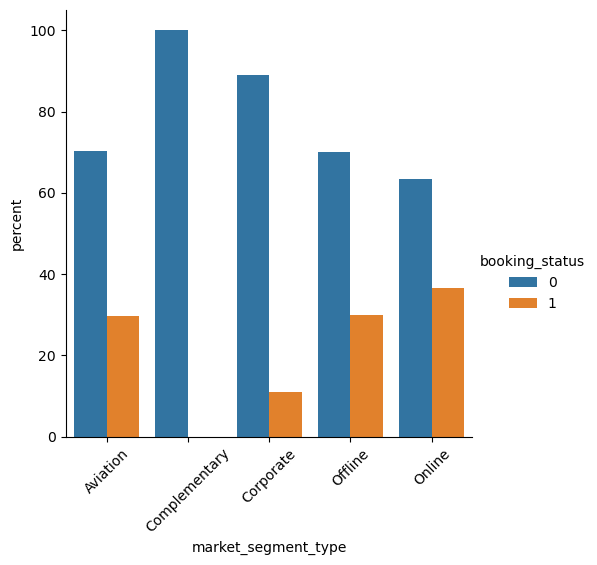

In [22]:
(df.groupby('market_segment_type')['booking_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), 
x='market_segment_type',y='percent',hue='booking_status',kind='bar'))
plt.xticks(rotation=45);

Complementary rooms are observed to not have any cancellations. Corporate customers are most likely to retain their rooms while online customers are most likely to cancel their rooms.

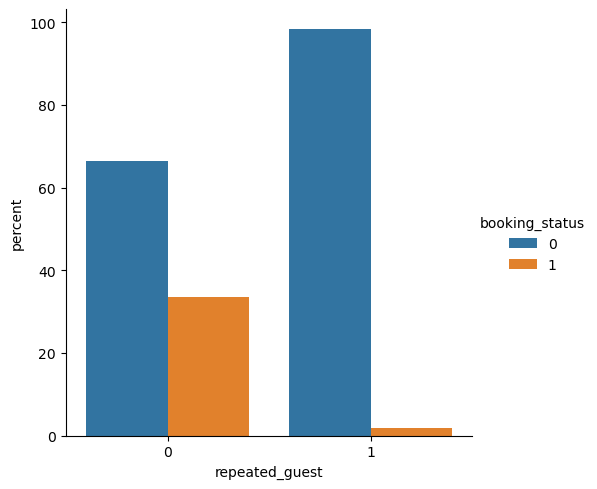

In [23]:
(df.groupby('repeated_guest')['booking_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), 
x='repeated_guest',y='percent',hue='booking_status',kind='bar'));

As expected, repeated guests are less likely to cancel.

<AxesSubplot: xlabel='booking_status', ylabel='avg_price_per_room'>

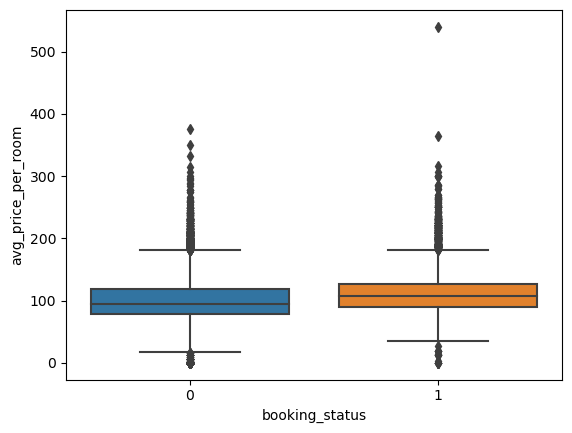

In [24]:
sns.boxplot(x='booking_status',y='avg_price_per_room',data=df)

Median price for the cancelled rooms are slightly more expensive, with the most expensive room being more than $500.

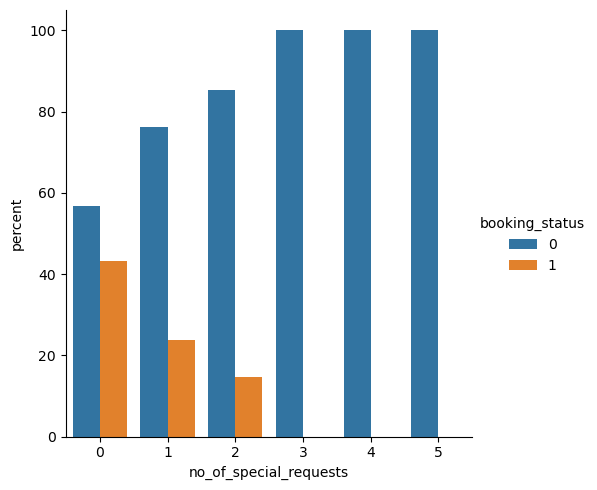

In [25]:
# no_of_special_requests
(df.groupby('no_of_special_requests')['booking_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), 
x='no_of_special_requests',y='percent',hue='booking_status',kind='bar'));

Those with more special requests are less likely to cancel their bookings.

## Data Modelling

In [26]:
df['booking_status'].value_counts(normalize=True)

0    0.672364
1    0.327636
Name: booking_status, dtype: float64

Baseline model of 33%

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, f1_score
# pip install optuna
import optuna

In [28]:
df2 = pd.get_dummies(df, columns=['type_of_meal_plan','room_type_reserved','market_segment_type'], drop_first=True)
df2.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
X = df2.drop('booking_status', axis=1)
y = df2['booking_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

#### Model 1 - Logistic Regression

In [31]:
#Code taken from https://coderzcolumn.com/tutorials/machine-learning/simple-guide-to-optuna-for-hyperparameters-optimization-tuning#5

def objective(trial):
    penalty = trial.suggest_categorical("penalty", ["l1", "l2"])
    tol = trial.suggest_float("tol", 0.0001, 0.01, log=True)
    C = trial.suggest_float("C", 1.0, 10.0, log=True)
    intercept = trial.suggest_categorical("fit_intercept", [True, False])
    solver = trial.suggest_categorical("solver", ["liblinear", "saga"])

    ## Create Model
    classifier = LogisticRegression(penalty=penalty,
                                    tol=tol,
                                    C=C,
                                    fit_intercept=intercept,
                                    solver=solver,
                                    class_weight='balanced',
                                    multi_class="auto",
                                    max_iter = 1000,
                                    random_state = 42
                                   )
    ## Fit Model
    classifier.fit(Z_train, y_train)

    return round(cross_val_score(classifier, Z_test, y_test, scoring = 'f1', cv=5).mean(),5)

In [32]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

logr = optuna.create_study(study_name="LogisticRegression", direction="maximize")
logr.optimize(objective, n_trials=15)

In [33]:
print("Best Params : {}".format(logr.best_params))

print("\nBest F1 score : {}".format(logr.best_value))

Best Params : {'penalty': 'l1', 'tol': 0.00984881424131647, 'C': 1.0708263465650671, 'fit_intercept': True, 'solver': 'saga'}

Best F1 score : 0.70005


In [34]:
best_logr = LogisticRegression(**logr.best_params, multi_class="auto")
best_logr.fit(Z_train, y_train)

logr_train_score = round(cross_val_score(best_logr, Z_train, y_train, scoring = 'f1', cv=5).mean(),5)
logr_test_score = round(cross_val_score(best_logr, Z_test, y_test, scoring = 'f1', cv=5).mean(),5)

logr_train_prec = round(precision_score(y_train, best_logr.predict(Z_train)),5)
logr_test_prec = round(precision_score(y_test, best_logr.predict(Z_test)),5)

print("Logistic Regression F1 score on Train Dataset : {}".format(logr_train_score))
print("Logistic Regression F1 score on Test  Dataset : {}".format(logr_test_score))
print("Logistic Regression Precision on Train Dataset : {}".format(logr_train_prec))
print("Logistic Regression Precision on Test Dataset : {}".format(logr_test_prec))

Logistic Regression F1 score on Train Dataset : 0.67545
Logistic Regression F1 score on Test  Dataset : 0.68422
Logistic Regression Precision on Train Dataset : 0.73825
Logistic Regression Precision on Test Dataset : 0.74963


Logistic Regression beats the baseline model and there is no overfitting. Precision is important as we do not want the hotel to have too many false positives, which might lead to overbooking if the management opens up the room for booking.

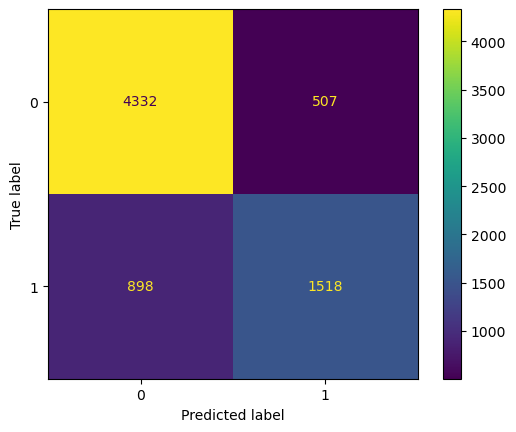

In [35]:
# plot_confusion_matrix(best_logr, Z_test, y_test, cmap='Blues', 
#                       values_format='d', display_labels=['Not Cancelled', 'Cancelled']);

predictions = best_logr.predict(Z_test)
cm = confusion_matrix(y_test, predictions, labels=best_logr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_logr.classes_)
disp.plot();

#### Model 2 - Random Forest

In [36]:
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 10, 1000)
    max_depth = trial.suggest_int("max_depth", 2, 32, log = True)
    max_features = trial.suggest_int("max_features", 2, 50, log = True)
    ccp_alpha = trial.suggest_float("ccp_alpha", 1e-5, 1)
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])

    ## Create Model
    classifier = RandomForestClassifier(n_estimators = n_estimators,
                                        max_depth = max_depth,
                                        max_features = max_features,
                                        ccp_alpha = ccp_alpha,
                                        bootstrap = bootstrap,
                                        class_weight='balanced',
                                        random_state = 42
                                       )
    ## Fit Model
    classifier.fit(X_train, y_train)

    return round(cross_val_score(classifier, X_test, y_test, scoring = 'f1', cv=5).mean(),5)

In [37]:
rf = optuna.create_study(study_name="RandomForest", direction="maximize")
rf.optimize(objective, n_trials=15)

In [38]:
print("Best Params : {}".format(rf.best_params))

print("\nBest F1 Score : {}".format(rf.best_value))

Best Params : {'n_estimators': 635, 'max_depth': 8, 'max_features': 11, 'ccp_alpha': 0.0018814643646927337, 'bootstrap': False}

Best F1 Score : 0.75954


In [39]:
best_rf = RandomForestClassifier(**rf.best_params)
best_rf.fit(X_train, y_train)

rf_train_score = round(cross_val_score(best_rf, X_train, y_train, scoring = 'f1', cv=5).mean(),5)
rf_test_score = round(cross_val_score(best_rf, X_test, y_test, scoring = 'f1', cv=5).mean(),5)

rf_train_prec = round(precision_score(y_train, best_rf.predict(X_train)),5)
rf_test_prec = round(precision_score(y_test, best_rf.predict(X_test)),5)

print("Random Forest F1 score on Train Dataset : {}".format(rf_train_score))
print("Random Forest F1 score on Test  Dataset : {}".format(rf_test_score))
print("Random Forest Precision on Train Dataset : {}".format(rf_train_prec))
print("Random Forest Precision on Test Dataset : {}".format(rf_test_prec))

Random Forest F1 score on Train Dataset : 0.73857
Random Forest F1 score on Test  Dataset : 0.73591
Random Forest Precision on Train Dataset : 0.82355
Random Forest Precision on Test Dataset : 0.82207


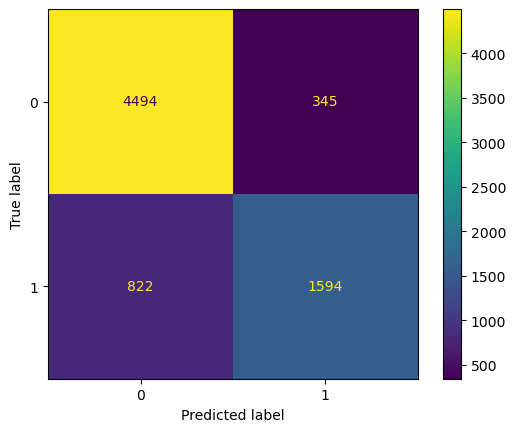

In [40]:
# plot_confusion_matrix(best_rf, X_test, y_test, cmap='Blues', 
#                       values_format='d', display_labels=['Not Cancelled', 'Cancelled']);

predictions = best_rf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=best_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_rf.classes_)
disp.plot();

#### Model 3

In [41]:
class_weights = len(y) / (2 * pd.value_counts(y))
class_weights

0    0.743645
1    1.526083
Name: booking_status, dtype: float64

In [42]:
def objective(trial):
    
    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False,
        'scale_pos_weight': class_weights[1]/class_weights[0]
    }

    ## Create Model
    classifier = XGBClassifier(**params, random_state = 42)
    ## Fit Model
    classifier.fit(X_train, y_train)

    return round(cross_val_score(classifier, X_test, y_test, scoring = 'f1', cv=5).mean(),5)

In [43]:
xgb = optuna.create_study(study_name="XGBoost", direction="maximize")
xgb.optimize(objective, n_trials=15)

In [44]:
print("Best Params : {}".format(xgb.best_params))

print("\nBest F1 Scpre : {}".format(xgb.best_value))

Best Params : {'max_depth': 9, 'learning_rate': 0.4519631198371651, 'n_estimators': 483, 'min_child_weight': 5, 'gamma': 1.545288605352219e-08, 'subsample': 0.9762408479044903, 'colsample_bytree': 0.03208091283935986, 'reg_alpha': 2.0829042764825995e-08, 'reg_lambda': 1.2978731006186807e-08}

Best F1 Scpre : 0.74656


In [45]:
best_xgb = XGBClassifier(**xgb.best_params)
best_xgb.fit(X_train, y_train)

xgb_train_score = round(cross_val_score(best_xgb, X_train, y_train, scoring = 'f1', cv=5).mean(),5)
xgb_test_score = round(cross_val_score(best_xgb, X_test, y_test, scoring = 'f1', cv=5).mean(),5)

xgb_train_prec = round(precision_score(y_train, best_xgb.predict(X_train)),5)
xgb_test_prec = round(precision_score(y_test, best_xgb.predict(X_test)),5)

print("XGBoost F1 score on Train Dataset : {}".format(xgb_train_score))
print("XGBoost F1 score on Test  Dataset : {}".format(xgb_test_score))
print("XGBoost Precision on Train Dataset : {}".format(xgb_train_prec))
print("XGBoost Precision on Test Dataset : {}".format(xgb_test_prec))

XGBoost F1 score on Train Dataset : 0.75068
XGBoost F1 score on Test  Dataset : 0.73719
XGBoost Precision on Train Dataset : 0.82101
XGBoost Precision on Test Dataset : 0.80888


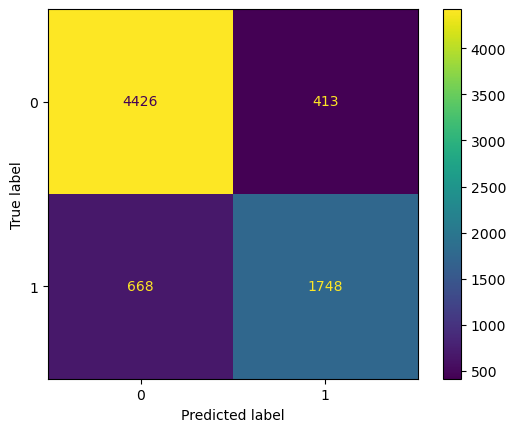

In [46]:
# plot_confusion_matrix(best_xgb, X_test, y_test, cmap='Blues', 
#                       values_format='d', display_labels=['Not Cancelled', 'Cancelled']);

predictions = best_xgb.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=best_xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_xgb.classes_)
disp.plot();

## Model Evaluation

#### False Positive vs False Negative Analysis

|Model|Train F1 Score|Test F1 Score|Train Precision|Test Precision|
|---|---|---|---|---|
|Logistic Regression|0.67555|0.68877|0.73658|0.74963|
|Random Forest Classification|0.60827|0.61138|0.83151|0.832|
|XGBoost Classifier|0.79603|0.75656|0.85601|0.84516|

XGBoost was chosen because it has the best performing F1 score and precision out of the 3 models. 

F1 score, which represents the harmonic mean between the precision and recall, provides a balanced summary of our model performance, given that we are working with an imbalanced dataset. 

#### Cost Benefit Analysis

In [47]:
df2['avg_price_per_room'].mean()                

103.42353907649897

In [48]:
df2['avg_price_per_room'].median()

99.45

To simplify the cost benefit analysis, I will use $103 as the room price for any day and room.

##### Cost & Benefit
- Cost: Compensation to the customer => one night's stay + transportation cost to the new property = \\$103 + \\$20 = \$123 ([*source*](https://revenue-hub.com/hotel-overbooking-strategy-what-you-need-know/))

- Benefit: Additional revenue => Cost of an additional room = \$103

##### Model was used

The worst case scenario in using the model would be that the hotel is overbooked. Assuming there are x rooms, the hotel will be earning \\$103 * x = \\$103x. When we factor in the compensation the hotel needs to pay to those they did not honour the rooms to, (0.15x based on 1-precision (also known as the % of time the model will predict that customer will cancel when in fact they did not)), the total revenue is \\$103x - (\\$123)*0.15x = \$84.55x. 

##### Model was not used 

If we did not use the model, based on global average occupancy rates, the hotel would be operating at 65\% - 80\% capacity 
([*source*](https://hoteltechreport.com/news/occupancy-rate)). For simplity, we will take the occupancy rate as 75\%. The total revenue would be \\$103*0.75x = \$77.25x

##### Revenue comparison
This would generate an increase of ~9.5\% revenue if the hotel used the model. 

#### Feature importance

In [49]:
feature_impt = pd.DataFrame(best_xgb.feature_importances_, X_test.columns, columns=['importance'])
feature_impt.sort_values('importance', ascending = False).head(10)

,importance
no_of_special_requests,0.211578
arrival_year,0.194910
market_segment_type_Online,0.138027
market_segment_type_Offline,0.094128
market_segment_type_Complementary,0.082117
type_of_meal_plan_Meal Plan 2,0.056565
repeated_guest,0.043769
required_car_parking_space,0.039648
market_segment_type_Corporate,0.038869
arrival_month,0.022462


## Conclusions and Recommendations